In [ ]:
# install only what you need now
!pip install PyPDF2              # or pdfminer.six if you prefer
!pip install -U nltk spacy scikit-learn
!python -m spacy download en_core_web_sm


In [ ]:
import os, io, re
import pandas as pd
from google.colab import drive

# PDF → text
from PyPDF2 import PdfReader

# basic NLP
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords

# vectorization & similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# (optional later) dimensionality reduction
from sklearn.decomposition import TruncatedSVD

# lightweight spaCy for tokenization / NER down the road
import spacy
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install gdown if you haven’t yet
!pip install --quiet gdown

# download the ZIP from Google Drive by its file ID
!gdown --id 1cMQB38bdbh5Z3NxHNqrnXo2nQ3c4z-xq --output cvs.zip

# unzip into a folder named /content/cvs
!unzip -qq cvs.zip -d /content/cvs


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cMQB38bdbh5Z3NxHNqrnXo2nQ3c4z-xq
To: /content/cvs.zip
100% 1.42M/1.42M [00:00<00:00, 62.5MB/s]
replace /content/cvs/cv/10030015.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!ls -lh cvs.zip


-rw-r--r-- 1 root root 1.4M Apr 15 11:05 cvs.zip


In [ ]:
!ls -R /content


/content:
cvs  cvs.zip  drive  resume.csv  sample_data  vacancies.csv

/content/cvs:
cv

/content/cvs/cv:
10030015.pdf  10501991.pdf  10909673.pdf  11580408.pdf	12011623.pdf
10062724.pdf  10504237.pdf  10909720.pdf  11584809.pdf	12065211.pdf
10076271.pdf  10527994.pdf  10953078.pdf  11616482.pdf	12071138.pdf
10089434.pdf  10549585.pdf  10985403.pdf  11637468.pdf	12202337.pdf
10219099.pdf  10553553.pdf  11065180.pdf  11672279.pdf	12338274.pdf
10228751.pdf  10554236.pdf  11163645.pdf  11676151.pdf	12341902.pdf
10235211.pdf  10624813.pdf  11197262.pdf  11759079.pdf	12442909.pdf
10247517.pdf  10641230.pdf  11262933.pdf  11813872.pdf	12467531.pdf
10251432.pdf  10674770.pdf  11266906.pdf  11877150.pdf	12674256.pdf
10265057.pdf  10712803.pdf  11336022.pdf  11890896.pdf	12858898.pdf
10289113.pdf  10839851.pdf  11441764.pdf  11943065.pdf	14140903.pdf
10329506.pdf  10840430.pdf  11490673.pdf  11981094.pdf	3547447.pdf

/content/drive:
MyDrive

/content/drive/MyDrive:
 10.1016@0008-62238390155-0.p

In [ ]:
!unzip -l cvs.zip


Archive:  cvs.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2025-04-15 08:29   cv/
    17940  2025-04-07 19:22   cv/10030015.pdf
    31779  2025-04-07 19:23   cv/10062724.pdf
    24208  2025-04-07 19:23   cv/10076271.pdf
    27103  2025-04-07 19:23   cv/10089434.pdf
    25581  2025-04-07 19:22   cv/10219099.pdf
    20368  2025-04-07 19:22   cv/10228751.pdf
    25304  2025-04-07 19:22   cv/10235211.pdf
    25304  2025-04-07 19:23   cv/10247517.pdf
    23813  2025-04-07 19:23   cv/10251432.pdf
    20247  2025-04-07 19:23   cv/10265057.pdf
    22570  2025-04-07 19:22   cv/10289113.pdf
    20169  2025-04-07 19:22   cv/10329506.pdf
    29519  2025-04-07 19:22   cv/10501991.pdf
    24655  2025-04-07 19:23   cv/10504237.pdf
    16002  2025-04-07 19:23   cv/10527994.pdf
    40023  2025-04-07 19:22   cv/10549585.pdf
    24212  2025-04-07 19:23   cv/10553553.pdf
    48278  2025-04-07 19:21   cv/10554236.pdf
    25479  2025-04-07 19:22   cv/10624813.pdf
    

In [ ]:
# Install pdfminer.six (if not already)
!pip install --quiet pdfminer.six tqdm


In [ ]:

import os
from pdfminer.high_level import extract_text
from tqdm import tqdm  # for a progress bar

cv_texts = {}
root_dir = '/content/cvs'  # or wherever your PDFs live

# Walk through all subfolders and grab .pdf files
for root, _, files in os.walk(root_dir):
    for fname in files:
        if fname.lower().endswith('.pdf'):
            fullpath = os.path.join(root, fname)
            try:
                # extract_text pulls all pages at once
                text = extract_text(fullpath)
            except Exception as e:
                print(f"⚠️ Error reading {fname}: {e}")
                text = ''
            cv_texts[fname] = text

print(f"✅ Loaded {len(cv_texts)} CVs")


✅ Loaded 60 CVs


In [ ]:
print(cv_texts)

{'10265057.pdf': "WORKING RF SYSTEMS ENGINEER\nQualifications\nMicrosoft office/Office for Mac, pages, numbers, keynote Â· RF/Microwave software: Ansoft Designer, AWR Microwave Office. Â· RF test\ninstruments: Spectrum analyzer, Vector Network/Signal Analyzer, Logic Analyzer, etc. Â· Programming language: C/C++, Python, Java,\nMatlab, and LabView Â· Circuit design software: SPICE, NI Multisim Â· PCB design software: Eagle, PCB Artiest\nExperience\nWorking RF Systems Engineer \nMay 2014 to Current Company Name\n\nQualification Â· Multidisciplinary background: RF hardware designs, manufacturing operations and data analyst.\nSummary Â· Experienced in developing hardware's DFM procedures, checklists and requirements to subcontractors Â· Perform EVT,\nDVT, PVT verifications and utilize FA process to drive root cause from system to unit level Â· Team leader on multiple end-to-end\ntechnical project design, development, testing and validation Â· Manage Test/Production readiness reviews and dr

In [ ]:
import pandas as pd

# 1. Read the CSV with the Python engine, skipping bad lines
resumes = pd.read_csv(
    'resume.csv',
    engine='python',
    on_bad_lines='skip',       # drop lines that throw parsing errors
    sep=',',                   # adjust if your delimiter is different
    quotechar='"'              # make sure quotes are handled
)

# 2. Inspect what loaded
print(f"Loaded {len(resumes)} rows with columns:\n", resumes.columns.tolist())
resumes.head()


Loaded 938 rows with columns:
 ['ID', 'Resume_str', 'Resume_html', 'Category', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65

,ID,Resume_str,Resume_html,Category,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 3. Force the résumé text column to string
resumes['Resume_str'] = resumes['Resume_str'].astype(str)

# 4. (Optional) Drop any fully empty columns
resumes.dropna(axis=1, how='all', inplace=True)

# 5. Rename and keep only the columns you need
resumes.rename(columns={'Resume_str': 'text'}, inplace=True)
resumes = resumes[['ID', 'text', 'Category']]

print(resumes.shape)
resumes.head()


(938, 3)


,ID,text,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


In [ ]:
resumes.head()

,ID,text,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


In [ ]:
vacancies = pd.read_csv('vacancies.csv')
vacancies.head()

,Job_ID,Job_Title,Job_Description,Category
0,1,HR Specialist,"Responsible for handling recruitment, employee...",HR
1,2,Marketing Manager,"Oversee marketing strategies, manage a marketi...",Marketing
2,3,Data Scientist,"Work with large datasets, build machine learni...",Data Science
3,4,Software Engineer,"Develop and maintain software applications, co...",Software Engineering
4,5,Sales Manager,"Manage the sales team, build customer relation...",Sales


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import nltk
import re
from nltk.corpus import stopwords

# Download the 'stopwords' resource (corrected typo)
nltk.download('stopwords')

# Load the spaCy language model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Define stopwords for removal using NLTK
stop_words = set(stopwords.words('english'))

def clean_text_with_lemmatization(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', ' ', text)

    # Tokenize the text and remove stopwords using spaCy's tokenizer
    doc = nlp(text)

    # Lemmatize the tokens using spaCy and filter out stopwords and tokens with length 1
    lemmatized_tokens = [token.lemma_ for token in doc if token.text not in stop_words and len(token.text) > 1]

    return ' '.join(lemmatized_tokens)

# Apply the function to clean the resumes and vacancies data
resumes['clean_text'] = resumes['text'].apply(clean_text_with_lemmatization)
vacancies['cleaned'] = vacancies['Job_Description'].apply(clean_text_with_lemmatization)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume you have a single vacancy to match (this can be any row from the vacancies dataset)
vacancy_text = """
We are looking for a skilled HR Manager with expertise in recruitment, employee relations, and performance management.
The ideal candidate should have experience in managing a team and developing HR strategies.
"""

# Clean the vacancy text using the same preprocessing function (cleaning and lemmatization)
vacancy_clean = clean_text_with_lemmatization(vacancy_text)  # Use the same function you've already defined

# Vectorize the vacancy description (convert it to the same numerical representation)
vectorizer = TfidfVectorizer(stop_words='english')
resumes_tfidf = vectorizer.fit_transform(resumes['clean_text'])  # Vectorize all resumes' cleaned text
vacancy_tfidf = vectorizer.transform([vacancy_clean])  # Vectorize the single vacancy description

# Calculate cosine similarity between the vacancy and all resumes
similarity_scores = cosine_similarity(vacancy_tfidf, resumes_tfidf)

# Get the index of the most similar resume
most_similar_resume_index = similarity_scores.argmax()

# Retrieve the most similar resume
most_similar_resume = resumes.iloc[most_similar_resume_index]

# Display the matched resume and its similarity score
print(f"The most relevant resume for the given vacancy is:\n")
print(f"Resume ID: {most_similar_resume['ID']}")
print(f"Resume Text: {most_similar_resume['text']}")
print(f"Similarity Score: {similarity_scores[0][most_similar_resume_index]:.4f}")


The most relevant resume for the given vacancy is:

Resume ID: 17812897
Resume Text:          HR MANAGER         Skill Highlights           HR SKILLS  HR Department Startup  Three New Organization Startups  Employment Law  FMLA/ADA/EEO/WC  Mediation & Advocacy  HR Policies & Procedures	*Staff Recruitment & Retention  Salary Negotiations  Employee Relations  Benefits Administration  Unemployment Administration  Worker's Compensation Administration  Orientation & On-Boarding  HRIS Technologies  Training & Development  Performance Management  Organizational Development  HR Program/Project Management  HRIS applications (Lawson, Paychex, Kronos, ADP)  MS Office (Word, Excel, PowerPoint, Publisher, Access, Visio, Outlook)                Professional Experience      HR Manager     Jan 2015   to   Current      Company Name   －   City  ,   State     Manage the Human Resource function for e-Cycle's corporate office as well as their fulfillment and data center, consisting of benefits and compensa

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have 'vacancies' and 'resumes' DataFrames with preprocessed 'cleaned' columns

# Example: Select a specific vacancy to match (you can change this to any other vacancy)
vacancy_index = 0  # For example, selecting the first vacancy
vacancy_text = vacancies.iloc[vacancy_index]['Job_Description']

# Clean the vacancy text (using your clean_text_with_lemmatization function)
vacancy_clean = clean_text_with_lemmatization(vacancy_text)  # Preprocess the vacancy text

# Vectorize the resumes and the selected vacancy
vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize resumes' cleaned text
resumes_tfidf = vectorizer.fit_transform(resumes['clean_text'])

# Vectorize the single vacancy description
vacancy_tfidf = vectorizer.transform([vacancy_clean])

# Calculate cosine similarity between the vacancy and all resumes
similarity_scores = cosine_similarity(vacancy_tfidf, resumes_tfidf)

# Get the index of the most similar resume
most_similar_resume_index = similarity_scores.argmax()

# Retrieve the most similar resume
most_similar_resume = resumes.iloc[most_similar_resume_index]

# Retrieve the matched vacancy
matched_vacancy = vacancies.iloc[vacancy_index]

# Print the matched vacancy and resume information
print(f"Matched Vacancy Information:\n")
print(f"Job Description: {matched_vacancy['Job_Description']}")
print(f"Cleaned Description: {matched_vacancy['cleaned']}")
print(f"\nMatched Resume Information:\n")
print(f"Resume ID: {most_similar_resume['ID']}")
print(f"Resume Text: {most_similar_resume['text']}")
print(f"Similarity Score: {similarity_scores[0][most_similar_resume_index]:.4f}")


Matched Vacancy Information:

Job Description: Responsible for handling recruitment, employee relations, and benefits management. Must have strong communication and organizational skills.
Cleaned Description: responsible handle recruitment employee relation benefit management must strong communication organizational skill

Matched Resume Information:

Resume ID: 73077810
Resume Text:          HR GENERALIST/RECRUITER           Summary     Human Resource Generalist who is an great communicator and negotiator with strong conflict resolution skills. Extensive background in recruitment and retention, mediation and records management.       Highlights         ADP, People fluent, Microsoft Offices, Interviewing expertise  Performance management strategies  Benefits administrator  Employee relations  Benefits administrator  Manager coaching and training  HRIS applications proficient  Payroll expertise  National Human Resources Association  Event management  Employee handbook development  Quick

# Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer here
from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB here
from sklearn.metrics import accuracy_score, classification_report # Import accuracy and classification report metrics

resumes = resumes.dropna(subset=['clean_text', 'Category'])

resumes = resumes.reset_index(drop=True)
X = resumes['clean_text']  # Text data (cleaned resumes)
y = resumes['Category']  # Labels (job categories like HR, Data Science, etc.)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Vectorize the cleaned text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train a Naive Bayes classifier
classifier = MultinomialNB() # Initialize MultinomialNB
classifier.fit(X_train_tfidf, y_train)

# Step 5: Predict categories on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7119565217391305

Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                precision    recall  f1-score   support

 </span> <span class=""jobdates"" format=""%m/%Y"" id=""2889ba25-598f-4cae-9f07-3400bd2e9b42JSTD2""> 09/2018</span> <span dependency=""JSTD+EDDT"">  to </span> <span class=""jobdates"" format=""%m/%Y"" id=""2889ba25-598f-4cae-9f07-3400bd2e9b42EDDT2""> 07/2020</span>

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Assuming you already have the cleaned resumes dataset
# Define the skills you're interested in matching
skills = ["recruitment", "employee relations", "communication", "performance management", "team management"]

# Function to count how many skills are present in a resume
def count_skills_in_resume(resume_text, skills):
    # Tokenize the cleaned resume text
    tokens = resume_text.split()
    # Count how many of the skills are present in the resume text
    skill_count = sum(1 for token in tokens if token in skills)
    return skill_count

# Apply the function to count skills for each resume
resumes['skill_count'] = resumes['clean_text'].apply(lambda x: count_skills_in_resume(x, skills))

# Sort the resumes by skill count in descending order
most_skilled_resume = resumes.sort_values(by='skill_count', ascending=False).iloc[0]

# Display the most relevant resume based on the skills
print(f"The resume with the most matching skills is:\n")
print(f"Resume ID: {most_skilled_resume['ID']}")
print(f"Resume Text: {most_skilled_resume['text']}")
print(f"Number of Skills Matched: {most_skilled_resume['skill_count']}")

# Optionally: If you want to see top N resumes
top_n_resumes = resumes.nlargest(5, 'skill_count')  # Get top 5 resumes with most skills matched
print("\nTop 5 resumes based on matched skills:")
print(top_n_resumes[['ID', 'skill_count', 'clean_text']])


The resume with the most matching skills is:

Resume ID: 25676643
Resume Text:          HR SPECIALIST       Summary    An Human Resources Specialist  with over  9  years in recruitment and federal employment processes.  An energetic, innovative, out the box thinker who is a self-starter with excellent analytical, organizational and project management skills.  As an  HR Recruiter who communicates and collaborates effectively with all levels of personnel I rely on excellent interpersonal skills, outstanding customer service and a solid expertise in human resources management.  I possess an e   xtensive background in HR recruitment and staffing affairs, including experience in position management, HR Internship Program development and management, Pathways, Presidential Management Fellows, employee onboarding, orientation, HR policies, regulations and legal compliance.
*Demonstrated success in managing HR programs, developing teambuilding programs, and writing standard operating procedures

In [ ]:
# Step 5: Predict the category for a new resume description (e.g., HR)
new_resume_text = """
A highly motivated HR professional with experience in recruitment, employee relations, training, and performance management.
Strong skills in communication, conflict resolution, and organizational development.
"""
new_resume_clean = clean_text_with_lemmatization(new_resume_text)  # Apply the same preprocessing function
new_resume_tfidf = vectorizer.transform([new_resume_clean])  # Vectorize the new resume text

# Step 6: Predict the category (HR in this case)
predicted_category = classifier.predict(new_resume_tfidf)
print(f"The predicted category for the new resume is: {predicted_category[0]}")

# Step 7: Evaluate the model's performance
y_pred = classifier.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

The predicted category for the new resume is: HR
Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from collections import Counter

def get_most_frequent_terms(text_data):
    all_terms = ' '.join(text_data).split()
    term_counts = Counter(all_terms)
    return term_counts.most_common(20)

# Get the 20 most frequent terms from the cleaned data
resume_freq = get_most_frequent_terms(resumes['clean_text'])
vacancies_freq = get_most_frequent_terms(vacancies['cleaned'])

# Print the results
print("Most Frequent Terms in Resumes:", resume_freq)
print("Most Frequent Terms in vacancies:", vacancies_freq)

Most Frequent Terms in Resumes: [('state', 6031), ('company', 5510), ('city', 5475), ('management', 4386), ('name', 4197), ('customer', 4008), ('service', 3512), ('business', 3246), ('skill', 3187), ('sale', 3118), ('work', 2827), ('system', 2713), ('new', 2644), ('client', 2625), ('development', 2530), ('team', 2430), ('training', 2426), ('develop', 2362), ('provide', 2337), ('project', 2304)]
Most Frequent Terms in vacancies: [('management', 5), ('strong', 5), ('skill', 5), ('marketing', 5), ('manage', 4), ('team', 4), ('experience', 4), ('must', 3), ('strategy', 3), ('content', 3), ('recruitment', 2), ('employee', 2), ('communication', 2), ('oversee', 2), ('drive', 2), ('digital', 2), ('campaign', 2), ('work', 2), ('build', 2), ('datum', 2)]


-------------------------

<ipython-input-21-edc2cabb9b0e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF', y='Term', data=top_20_resume_terms, palette='viridis')


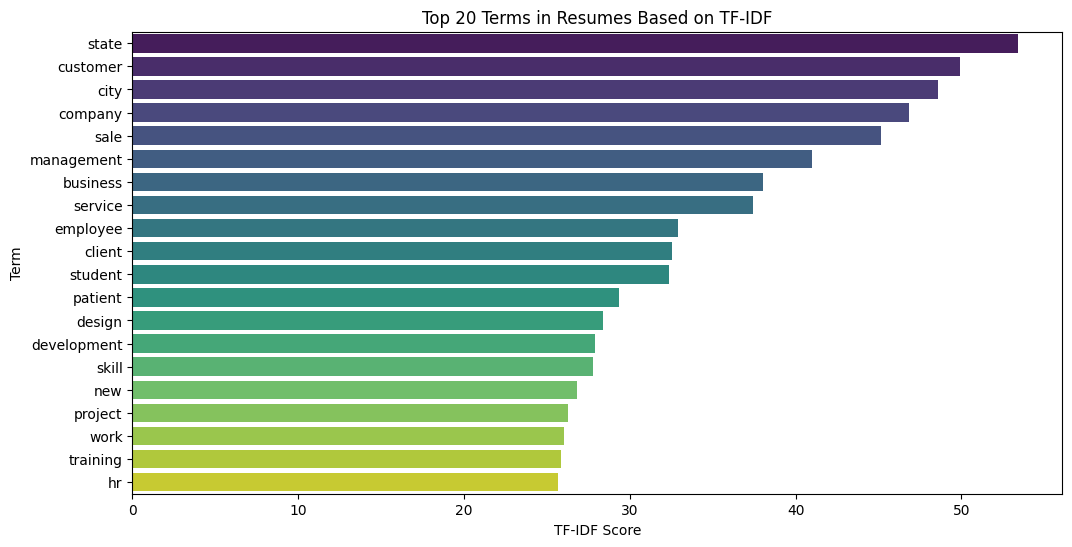

<ipython-input-21-edc2cabb9b0e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF', y='Term', data=top_20_vacancy_terms, palette='viridis')


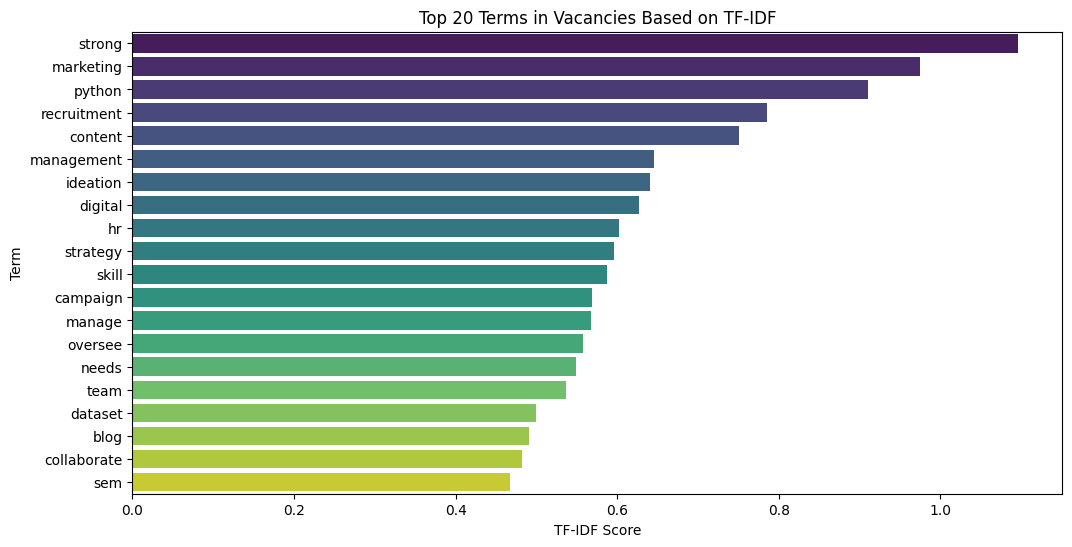

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize resumes and vacancies text
resumes_tfidf = vectorizer.fit_transform(resumes['clean_text'])
vacancies_tfidf = vectorizer.transform(vacancies['cleaned'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Sum the TF-IDF scores for each term (word) across all resumes and all vacancies
resume_tfidf_scores = resumes_tfidf.sum(axis=0).A1  # Convert to 1D array for easy handling
vacancy_tfidf_scores = vacancies_tfidf.sum(axis=0).A1  # Convert to 1D array for easy handling

# Create a DataFrame for the terms and their corresponding scores
resume_terms_df = pd.DataFrame(list(zip(terms, resume_tfidf_scores)), columns=['Term', 'TF-IDF'])
vacancy_terms_df = pd.DataFrame(list(zip(terms, vacancy_tfidf_scores)), columns=['Term', 'TF-IDF'])

# Get the top 20 terms based on the highest TF-IDF scores
top_20_resume_terms = resume_terms_df.sort_values(by='TF-IDF', ascending=False).head(20)
top_20_vacancy_terms = vacancy_terms_df.sort_values(by='TF-IDF', ascending=False).head(20)

# Plotting the top 20 terms for resumes
plt.figure(figsize=(12, 6))
sns.barplot(x='TF-IDF', y='Term', data=top_20_resume_terms, palette='viridis')
plt.title('Top 20 Terms in Resumes Based on TF-IDF')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.show()

# Plotting the top 20 terms for vacancies
plt.figure(figsize=(12, 6))
sns.barplot(x='TF-IDF', y='Term', data=top_20_vacancy_terms, palette='viridis')
plt.title('Top 20 Terms in Vacancies Based on TF-IDF')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.show()


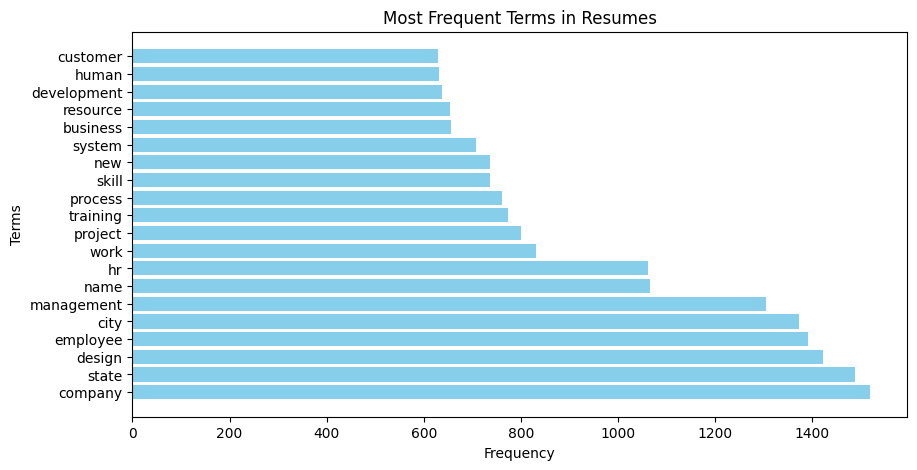

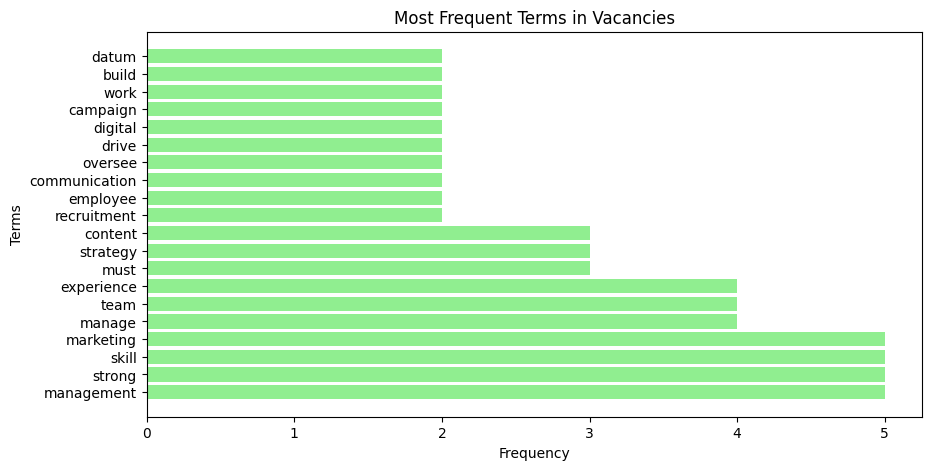

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to get most frequent terms
def get_most_frequent_terms(text_data):
    all_terms = ' '.join(text_data).split()
    term_counts = Counter(all_terms)
    return term_counts.most_common(20)

# Get the 20 most frequent terms from the cleaned data
resume_freq = get_most_frequent_terms(resumes['cleaned'])
vacancies_freq = get_most_frequent_terms(vacancies['cleaned'])

# Prepare data for the bar chart
resume_terms, resume_counts = zip(*resume_freq)
vacancies_terms, vacancies_counts = zip(*vacancies_freq)

# Plot the most frequent terms for resumes
plt.figure(figsize=(10, 5))
plt.barh(resume_terms, resume_counts, color='skyblue')
plt.title('Most Frequent Terms in Resumes')
plt.xlabel('Frequency')
plt.ylabel('Terms')
plt.show()

# Plot the most frequent terms for vacancies
plt.figure(figsize=(10, 5))
plt.barh(vacancies_terms, vacancies_counts, color='lightgreen')
plt.title('Most Frequent Terms in Vacancies')
plt.xlabel('Frequency')
plt.ylabel('Terms')
plt.show()


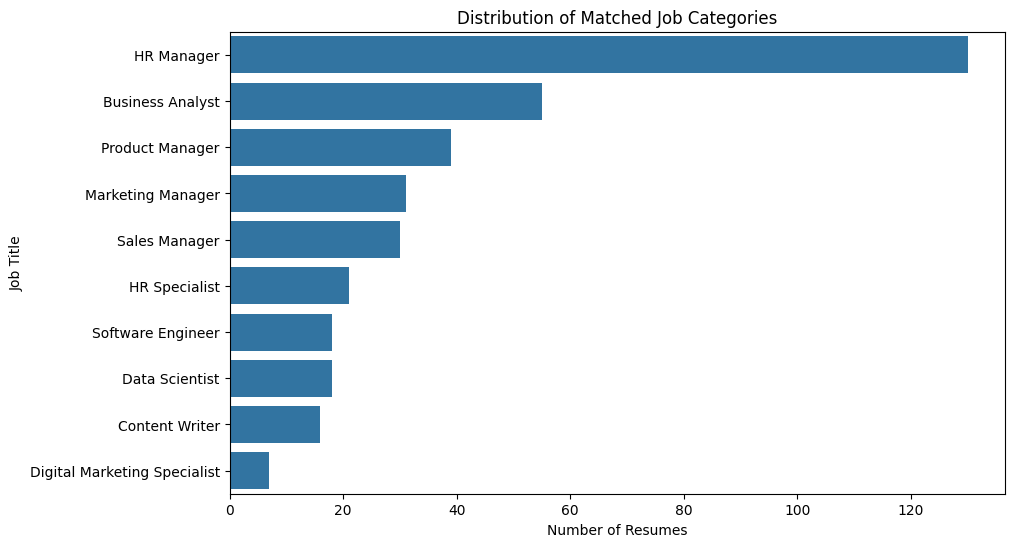

In [ ]:
import seaborn as sns

# Plot the distribution of best match job titles
job_category_counts = resumes['Best_Match_Job_Title'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(y='Best_Match_Job_Title', data=resumes, order=job_category_counts.index)
plt.title('Distribution of Matched Job Categories')
plt.xlabel('Number of Resumes')
plt.ylabel('Job Title')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF Vectorization to resumes and vacancies
vectorizer = TfidfVectorizer(max_features=20)  # Limit to top 20 words for visualization
resumes_tfidf = vectorizer.fit_transform(resumes['clean_text'])
vacancies_tfidf = vectorizer.transform(vacancies['Job_Description'])

# Get the top 20 words and their corresponding TF-IDF scores
resumes_tfidf_df = pd.DataFrame(resumes_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
vacancies_tfidf_df = pd.DataFrame(vacancies_tfidf.toarray(), columns=vectorizer.get_feature_names_out())





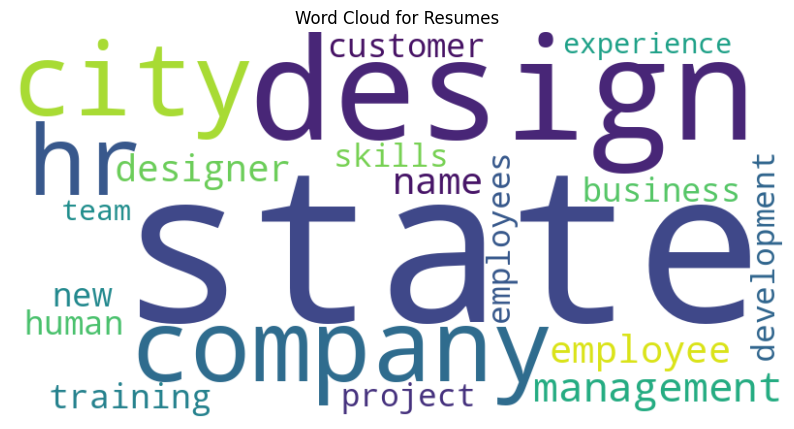

In [ ]:
# 1. Word Cloud for Resumes
resumes_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(resumes_tfidf_df.sum(axis=0).to_dict())
plt.figure(figsize=(10, 6))
plt.imshow(resumes_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Resumes')
plt.show()

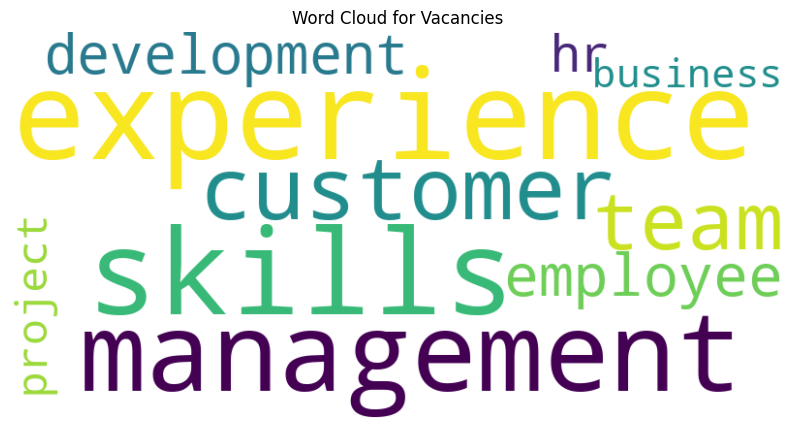

In [ ]:
# 2. Word Cloud for Vacancies
vacancies_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vacancies_tfidf_df.sum(axis=0).to_dict())
plt.figure(figsize=(10, 6))
plt.imshow(vacancies_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Vacancies')
plt.show()

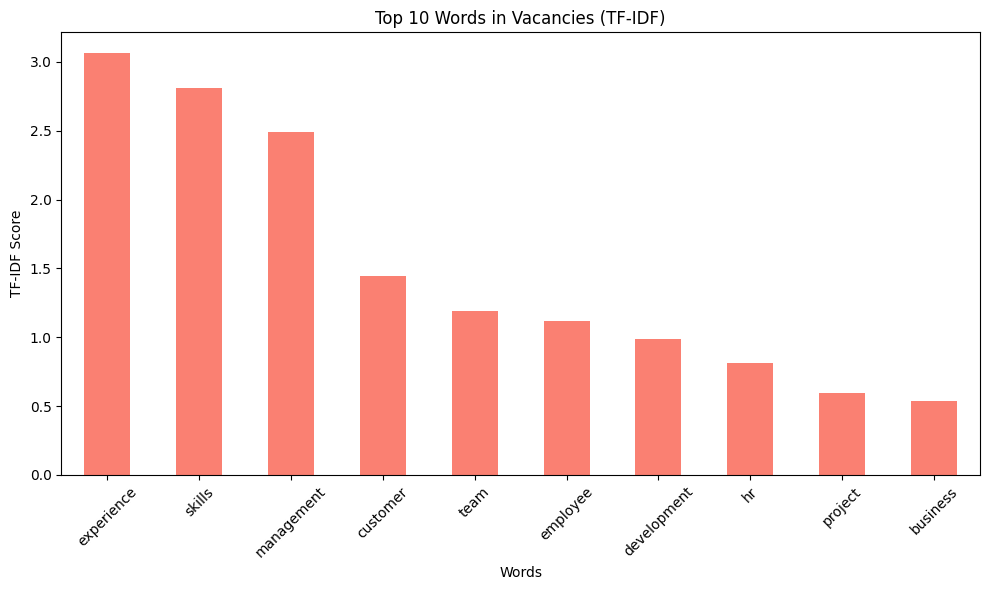

In [ ]:
# 4. Bar Plot of Top 10 Words in Vacancies
top_words_vacancies = vacancies_tfidf_df.sum(axis=0).sort_values(ascending=False).head(10)
top_words_vacancies.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title('Top 10 Words in Vacancies (TF-IDF)')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#KMEANS CLUSTER

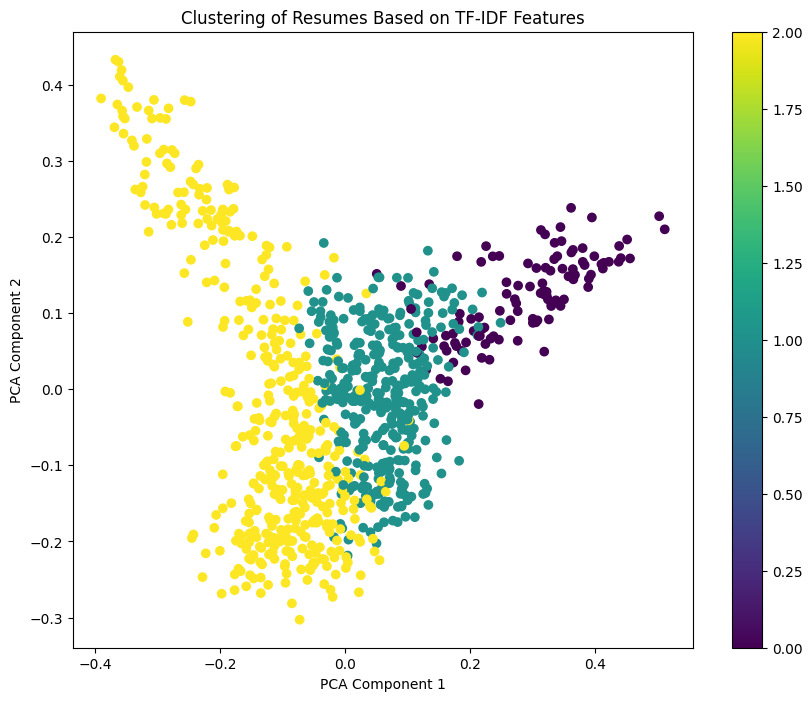

Cluster 0 contains 108 resumes.
Top terms in this cluster:
student, teacher, child, classroom, lesson, state, parent, city, school, curriculum
Cluster 1 contains 374 resumes.
Top terms in this cluster:
patient, state, city, design, fitness, company, customer, service, name, care
Cluster 2 contains 438 resumes.
Top terms in this cluster:
sale, customer, business, management, employee, company, hr, state, system, city


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Ensure no missing values in resumes DataFrame
resumes = resumes.dropna(subset=['clean_text']).reset_index(drop=True)

# Apply TF-IDF Vectorization to resumes
vectorizer = TfidfVectorizer()
resumes_tfidf = vectorizer.fit_transform(resumes['clean_text'])

# Apply KMeans clustering on TF-IDF of resumes
num_clusters =  3 # You can choose the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
resumes_clustered = kmeans.fit_predict(resumes_tfidf)

# Add cluster labels to the resumes dataframe
resumes['Cluster'] = resumes_clustered

# Reduce the dimensionality for visualization using PCA
pca = PCA(n_components=2)
resumes_2d = pca.fit_transform(resumes_tfidf.toarray())  # Ensure this is a NumPy array

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(resumes_2d[:, 0], resumes_2d[:, 1], c=resumes_clustered, cmap='viridis')
plt.title('Clustering of Resumes Based on TF-IDF Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Display the cluster assignments and common words per cluster
for cluster_num in range(num_clusters):
    cluster_resumes = resumes[resumes['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} contains {len(cluster_resumes)} resumes.")
    print("Top terms in this cluster:")
    cluster_center = kmeans.cluster_centers_[cluster_num]
    top_terms_idx = cluster_center.argsort()[-10:][::-1]
    top_terms = [vectorizer.get_feature_names_out()[i] for i in top_terms_idx]
    print(", ".join(top_terms))


In [ ]:
# Example: A new vacancy description
new_vacancy_text = """
We are seeking a highly skilled Financial Manager with a strong background in finance, accounting, and tax management.
The ideal candidate should have experience in overseeing financial operations, managing accounting teams, and ensuring compliance with tax regulations.
Strong analytical skills and the ability to develop financial strategies to drive business growth are essential.
"""

# Preprocess the new vacancy description
new_vacancy_clean = clean_text_with_lemmatization(new_vacancy_text)

# Step 3: Vectorize the new vacancy description using the same vectorizer
new_vacancy_tfidf = vectorizer.transform([new_vacancy_clean])

# Step 4: Predict the cluster using the KMeans model
predicted_cluster = kmeans.predict(new_vacancy_tfidf)

# Step 5: Display the result
print(f"The new vacancy belongs to Cluster: {predicted_cluster[0]}")

# Optionally, display the top terms in the predicted cluster
cluster_center = kmeans.cluster_centers_[predicted_cluster[0]]
top_terms_idx = cluster_center.argsort()[-10:][::-1]
top_terms = [vectorizer.get_feature_names_out()[i] for i in top_terms_idx]
print(f"Top terms in Cluster {predicted_cluster[0]}: {', '.join(top_terms)}")

The new vacancy belongs to Cluster: 2
Top terms in Cluster 2: sale, customer, business, management, employee, company, hr, state, system, city


<Figure size 1000x600 with 0 Axes>

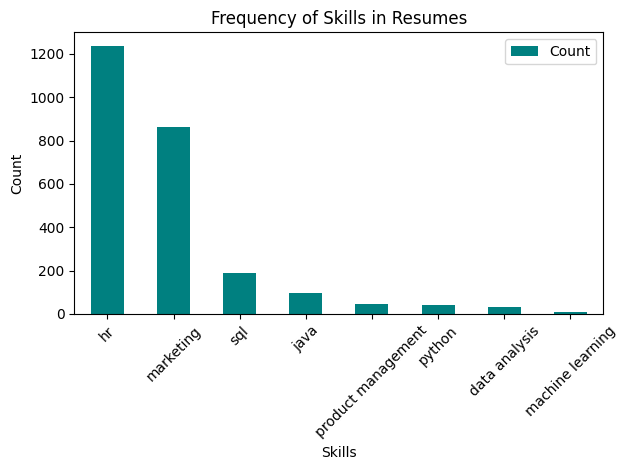

In [ ]:
# Create a list of specific skills you want to track, for example:
skills_list = ['python', 'java', 'sql', 'machine learning', 'marketing', 'data analysis', 'hr', 'product management']

# Count skills in each resume
skills_count = {skill: resumes['clean_text'].str.contains(skill, case=False).sum() for skill in skills_list}

# Create a DataFrame for skills count
skills_count_df = pd.DataFrame(list(skills_count.items()), columns=['Skill', 'Count'])

# Plot the skills count
plt.figure(figsize=(10, 6))
skills_count_df.sort_values('Count', ascending=False).plot(kind='bar', x='Skill', y='Count', color='teal')
plt.title('Frequency of Skills in Resumes')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Define the list of common skills you're looking for
skills_list = ["communication", "team management", "hr", "recruitment", "project management", "marketing"]

# Function to count the number of skills in a resume
def count_skills_in_resume(resume_text, skills_list):
    # Tokenize the cleaned resume text
    resume_tokens = resume_text.split()
    # Count how many of the skills are present in the resume text
    skill_count = sum(1 for skill in skills_list if skill in resume_tokens)
    return skill_count

# Apply the function to count skills for each resume
resumes['skill_count'] = resumes['clean_text'].apply(lambda x: count_skills_in_resume(x, skills_list))

# Sort the resumes by skill count in descending order to find the top matches
most_skilled_resume = resumes.sort_values(by='skill_count', ascending=False).iloc[0]

# Display the most relevant resume based on the skills matched
print(f"The resume with the most matching skills is:\n")
print(f"Resume ID: {most_skilled_resume['ID']}")
print(f"Resume Text: {most_skilled_resume['text']}")
print(f"Number of Skills Matched: {most_skilled_resume['skill_count']}")

# Optionally: Display top N resumes with the most skills matched
top_n_resumes = resumes.nlargest(5, 'skill_count')  # Get top 5 resumes with most skills matched
print("\nTop 5 resumes based on matched skills:")
print(top_n_resumes[['ID', 'skill_count', 'clean_text']])


The resume with the most matching skills is:

Resume ID: 24184357
Resume Text:          HR DIRECTOR           Summary    Human Resource Professional
Confident, Resourceful Human Resources professional, with academic background in human  resources management and hands-on experience hiring, training, orientating, and developing employees that currently serve in a one person role managing 63 employees for a fast growing organization.      Highlights          Analytical Skills		Good Interpersonal Skills		Organizational Skills		Communication Skills  Recruiting and Staffing	Performance Management 		Employee Relations		Selection/Recruiting  Employee Orientation	Training & Development		Policy & Procedure Writing	Detail Organization  Staff Supervision		Employee Records System		On-the-job Training		Job Analysis  Cold Calling		Internet Sourcing			Compensation			Labor Laws  Labor Policies		Equal Employment Opportunity	Interviewing			Discipline Issues  Social Networking	Recruitment Advertising		Cam